# Captum Visual Insights for BERT Seq Classification Model

This Notebook helps you to get started with the Captum Insights.The example covered here is from the Hugginface Transformers pre-trained model used in Torchserve.In order to understand the word importances and attributions when we make an Explanation Request, we use Captum Insights

In [1]:
import json
import captum
from captum.attr import visualization as viz
import os
import logging
import numpy as np
import json
import torch
from transformers import AutoTokenizer

Create the mar file for the BERTSeqClassification model and place the artefacts from where you can serve the model. 


In [2]:
!torch-model-archiver --model-name bert_explain --version 1.0 --serialized-file Transformer_model/pytorch_model.bin --handler Transformer_model/Transformer_handler_generalized.py --extra-files "Transformer_model/config.json,Transformer_model/setup_config.json,Transformer_model/index_to_name.json,Transformer_model/vocab.txt"

/bin/sh: 1: torch-model-archiver: not found


In [3]:
#curl request to make a Prediction Request
!curl -H "Content-Type: application/json" --data @examples/Huggingface_Transformers/bert_ts.json http://127.0.0.1:8080/predictions/bert_explain

Accepted

Make a Explanation response for the bert model by specifying body in the service envelope in the config.properties file, like below:

```
service_envelope=body
```
When a json file is passed as a request format to the curl, Torchserve unwraps the json file from the request body. This is the reason for specifying service_envelope=body in the config.properties file

In [4]:
#curl command to make an Explanation Request and the response is as below:
#bert_ts.json file contains the input for the inference request
!curl -H "Content-Type: application/json" --data @examples/Huggingface_Transformers/bert_ts.json http://127.0.0.1:8080/explanations/bert_explain

{
  "importances": [
    0.0,
    -0.6324464886855062,
    -0.03311582455592391,
    0.26816950103292936,
    -0.29124773714666485,
    0.5422589134206756,
    -0.3848765077942276,
    0.0
  ],
  "words": [
    "[CLS]",
    "bloomberg",
    "has",
    "reported",
    "on",
    "the",
    "economy",
    "[SEP]"
  ],
  "delta": -0.0007350820187373014
}

The above explanation response is present in the bert_response.json. From the BERT_Response.json file the attributions, importances and delta key-value pair are loaded

In [5]:
input_file=open('./bert_response.json', 'r')
input_json = json.load(input_file)

In [6]:
attributions = input_json['explanations'][0]['importances']
words = input_json['explanations'][0]['words']
delta = input_json['explanations'][0]['delta']


For visualization purpose using Captum, the attributions and delta parameters should be in the form of Torch Tensors. 

Making the arguments ready to be passed on to the VisualizationDataRecord method.The argument for predictions is given as 1(a random probability) in the VisualizationDataRecord method since it is not mandatory 

In [7]:

attributions = torch.tensor(attributions)
predictions = 1
label = 'Not Accepted'
true_label = 'Accepted'

Using the Visualization Data Record method from Captum's Visualization toolkit to render the visualization

In [8]:

result = viz.VisualizationDataRecord(
                        attributions,
                        predictions,
                        label,
                        true_label,
                        label,
                        attributions.sum(),       
                        words,
                        delta)    


In [9]:
viz.visualize_text([result])

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
Accepted,Not Accepted (1.00),Not Accepted,-0.04,[CLS] the recent climate change across world is impact ##ing negatively [SEP]


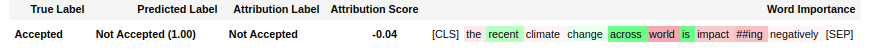

In [10]:
import IPython.display
IPython.display.Image(filename="bert_captum_visualization.png")